## Hyperparameter tuning in Python

**Course Structure:**
* Chapter 1. Hyperparameter and Parameters
* Chapter 2. Grid Search
* Chapter 3. Random Search
* Chapter 4. Informed Search

### CHAPTER 1. Hypeaparameter and Parameters

#### Part 1.1 Introduction & 'Parameters'

**Why do we need hyperparameter tuning?**
* New, complex algorithms with many hyperparameters
* Tuning can take a lot of time
* Develops deep understanding beyond the default settings
 
**Dataset used:**
* Relates to credit card defaults
* Variables related to the financial history of consumers in Taiwan
* 30,000 users and 24 attributes
* Target: whether they defaulted on their loan

**Parameters:**
* Components of the model learned during the modeling process
* You **DO NOT** set these manually
* The algorithm will discover these for you
* Ways to find parameters:
    1. Know a bit about the algorithm
    2. Consult the **Scikit Learn documentation**
    3. Check the **Attributes** section


In [1]:
# Code for part 1.1 

# extracting a Logistic Regression parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


# get the dataset
credit_card = pd.read_csv('20_datasets/credit-card-full.csv')
# print(credit_card.info())

# column preprocessing
credit_card = credit_card.drop(['ID'], axis=1)
credit_card = pd.get_dummies(data=credit_card, columns=['SEX','EDUCATION', 'MARRIAGE'],drop_first=True)
print(credit_card.shape)

# split into training and testing dataframe
X = credit_card.drop(['default payment next month'], axis=1)
y = credit_card['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# create a LR model
log_reg_clf = LogisticRegression()

# fit the model
log_reg_clf.fit(X_train, y_train)

# create a list of original variable names 
original_variables = X_train.columns

# extract the coefficients of the LR model
model_coefficients = log_reg_clf.coef_[0]

# create a dataframe of the variables and coefficients 
coefficient_df = pd.DataFrame({"Variable": original_variables, "Coefficient": model_coefficients})

# print out top 3 positive variables
top_three_df = coefficient_df.sort_values(by=['Coefficient'], axis=0, ascending=False)[0:3]
print(top_three_df)

(30000, 31)
     Variable  Coefficient
9   BILL_AMT2     0.000006
12  BILL_AMT5     0.000006
2       PAY_0     0.000005


E:\PYTHON\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


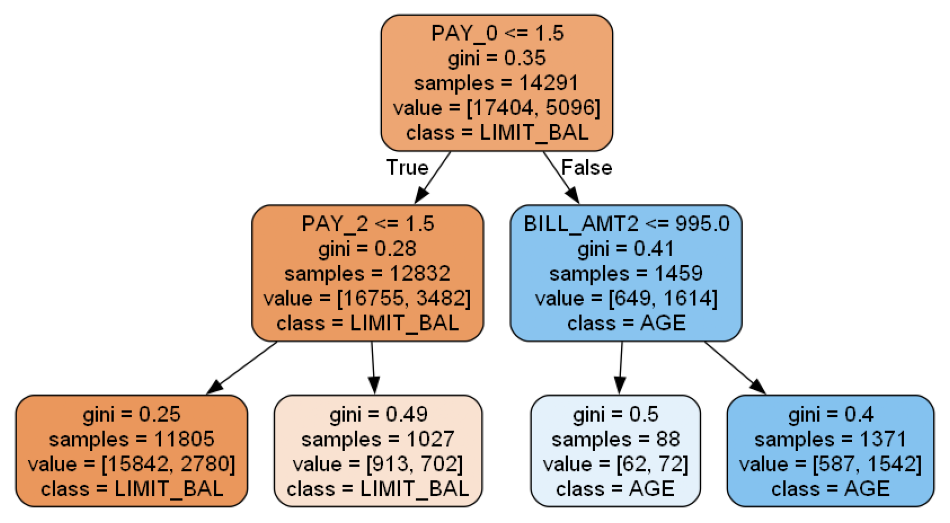

This node split on feature PAY_0 , at a value of 1.5


In [2]:
# Code for part 1.1 (continue)

# extracting a Random Forest parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import os
import matplotlib.pyplot as plt

# create a RF model
rf_clf = RandomForestClassifier(max_depth=2, random_state=123)

# fit the model
rf_clf.fit(X_train, y_train)

# extract the 7th tree from the random forest (index 6)
chosen_tree = rf_clf.estimators_[6]

# visualize the graph 
export_graphviz(chosen_tree, out_file='20_rf_tree.dot',
                feature_names=X_train.columns,
                class_names=X_test.columns,
                rounded=True, proportion=False,
                precision=2, filled=True)

os.system('dot -Tpng 20_rf_tree.dot -o Images/20_tree.png')
# call(['dot', '-Tpng', 'tree.dot', '-o', 'Images/20_tree.png', '-Gdpi=600'])

plt.figure(figsize=(12,12))
plt.imshow(plt.imread('Images/20_tree.png'))
plt.axis('off')
plt.show()

# extract the parameters and level of the top node (index 0)
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]
print('This node split on feature {} , at a value of {}'.format(split_column_name, split_value))


#### Part 1.2 Introducing hyperparameters

**Hyperparameters:**
* Something you set before the modeling process 
* The algorithm **DOES NOT** learn these 
* Every hyperparameter has a default value, you can overwrite them
* Some hyperparameters are **more important** than others
* Some hyperparameters **will not** help model performance
* Example: Random Forest important hyperparameters:
    * *'n_estimators'*
    * *'max_features'*
    * *'max_depth'*
    * *'min_sample_leaf'*
    * (maybe)*'criterion'*
      
**How to find hyperparameters that matter?**
* Learn this information from:
    1. Academic papers
    2. Blogs and tutorials from trusted sources 
    3. The Scikit Learn module documentation
    4. Experience

In [3]:
# Code for part 1.2 

# exploring Random Forest hyperparameters
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# get data ready
credit_card = pd.read_csv('20_datasets/credit-card-full.csv')

credit_card = credit_card.drop(['ID'], axis=1)
credit_card = pd.get_dummies(data=credit_card, columns=['SEX','EDUCATION', 'MARRIAGE'],drop_first=True)

X = credit_card.drop(['default payment next month'], axis=1)
y = credit_card['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# create a RF model
rf_clf_old = RandomForestClassifier(n_estimators=5, random_state=42)

# fit the model
rf_clf_old.fit(X_train, y_train)

# make predictions
rf_old_predictions = rf_clf_old.predict(X_test)

# get confusion matrix & accuracy for the old RF model
print("Confusion matrix: \n\n {} \n Accuracy Score: \n\n {}".format(confusion_matrix(y_test, rf_old_predictions), accuracy_score(y_test, rf_old_predictions)))

Confusion matrix: 

 [[5311  562]
 [1037  590]] 
 Accuracy Score: 

 0.7868


In [4]:
# Code for part 1.2 (continue)

# create a new RF model with better hyperparameters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# fit this to training data and obtain new predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# get confusion matrix & accuracy for the old RF model
print("Confusion matrix: \n\n {} \n Accuracy Score: \n\n {}".format(confusion_matrix(y_test, rf_new_predictions), accuracy_score(y_test, rf_new_predictions)))

# note the accuracy increased.

Confusion matrix: 

 [[5499  374]
 [ 997  630]] 
 Accuracy Score: 

 0.8172


In [5]:
# Code for part 1.2

# hyperparameters of KNN (use the same data)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# build a knn estimator for different value of n_neighbors
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)

print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}.".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))


The accuracy of 5, 10, 20 neighbours was 0.756, 0.7774666666666666, 0.7838666666666667.


#### Part 1.3 Hyperparameter values

**Which values to try for hyperparameters?**
* Specific to each algorithm & hyperparameter 
* Some best practice guidelines and tips do exist
* Some top tips:
    1. Be aware of conflicting hyperparameter choices
    2. Be aware of setting 'silly' values for different algorithms
        * Random forest with only 2 trees
        * KNN algorithm with 1 neighbor
    3. Increasing a hyperparameter by a very small amount will not affect the model performance much

**Automating hyperparameter tuning:**
* Try a **for loop** to iterate through options
* Store the result in a **DataFrame** to view
* Learning curve graph is also very helpful to assist hyperparameter tuning
* *'np.linspace(start, end, num)'* is more handy than *'range'* to create a number of values in decimal

In [6]:
# Code for part 1.3 

# automating hyperparameter choice (with same data from credit card)
from sklearn.ensemble import GradientBoostingClassifier

# set the learning rate & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# create the for loop to evaluate the model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])
    
# gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

# note learning_rate = 0.05 yields to the best accuracy.

   learning_rate  accuracy
0          0.001  0.783067
1          0.010  0.822667
2          0.050  0.822800
3          0.100  0.822533
4          0.200  0.819333
5          0.500  0.816133


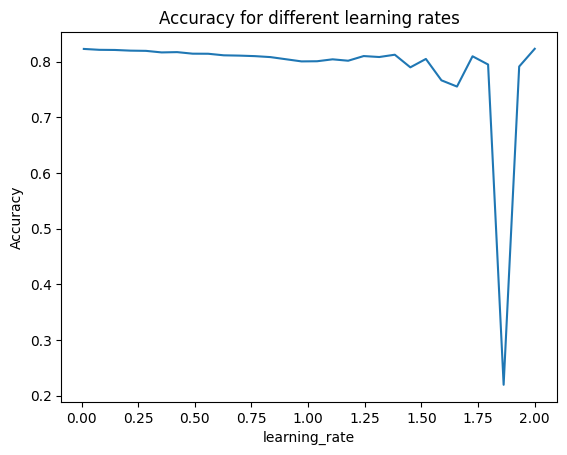

In [7]:
# Code for part 1.3 (continue)

# building learning curves
import numpy as np
import matplotlib.pyplot as plt

# set the learning rates & accuracies list
learning_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# create the for loop
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    
# plot results
plt.plot(learning_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning rates')
plt.show()

### CHAPTER 2. Grid Search

#### Part 2.1 Introducing Grid Search

* In previous lessons, we use a **for loop** to test different values of a hyperparameter
* Then, we store the results into a **DataFrame** to analyze
* How about testing values of two hyperparameters?
    * Nested for loops (too complicated)
    * Grid Search (recommendation)! 

**Grid Search advantages:**
* Fewer lines of code
* Find the best model with the grid
* Easy to explain

**Grid search disadvantages:**
* Computationally expensive
* Informed (the result of one model doesn't help create the next model)

In [8]:
# Code for part 2.1

# build Grid Search functions and apply it in for loops
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# create the function
def gbm_grid_search(learning_rate, max_depth):
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    predictions = model.fit(X_train, y_train).predict(X_test)
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

# create the relevant lists
results_list = []
learning_rate_list =[0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# create the for loop
for learn_rate in learning_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learning_rate=learn_rate, max_depth=max_depth))
        
print(results_list)

[[0.01, 2, 0.8233333333333334], [0.01, 4, 0.8213333333333334], [0.01, 6, 0.8182666666666667], [0.1, 2, 0.8226666666666667], [0.1, 4, 0.8233333333333334], [0.1, 6, 0.8184], [0.5, 2, 0.8181333333333334], [0.5, 4, 0.8050666666666667], [0.5, 6, 0.7926666666666666]]


#### Part 2.2 Grid Search with Scikit-Learn

* Steps:
1. Choosing an algorithm (to tune the hyperparameters)
2. Defining which hyperparameters we will tune
3. Defining a range of values for each hyperparameter
4. Setting a cross-validation scheme
5. Defining a score function, so we can decide which square on our grid was *'the best'*
6. Include extra useful information or functions
* In *'sklearn'*:
    * *'from sklearn.model_selection import GridSearchCV'*
    * Parameters:
        * *'estimator'* : algorithm
        * *'param_grid'* : setting which hyperparameters and values to test in a dictionary
        * *'cv'* : cross-validation
        * *'scoring'* : score to use to determine the best grid square/ model
        * *'refit'* : fits the best hyperparameters to the training data
        * *'n_jobs'* : allows multiple models to be created at the same time
        * *'return_train_score'* : logs statistics about the training runs

In [9]:
# Code for part 2.2 

# GridSearchCV with Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create an RF classifier
rf_class = RandomForestClassifier(criterion='entropy')

# create the parameter grid
param_grid = {'max_depth':[2,4,8,15],
              'max_features':['auto','sqrt']}

# create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True
)
print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')


#### Part 2.3 Understanding a grid search output

* Access the output using the dot notation
* *'grid_search_object.property'*
* The output properties are in three different groups:
1. Result log
    * *'cv_results_'*: read this into a DataFrame to print and analyze
      
2. The best results
    * *'best_index_'*: the row in our *'cv_results_.rank_test_score'* that has the best testing score
    * *'best_params_'*: the dictionary of parameters that gave the best score
    * *'best_score_'*: the actual best score
    * *'best_estimator'*: an estimator using the best parameters from the grid search
    
3. Extra information
    * *'scorer_'*: the scorer function used on the held out data 
    * *'n_splits_'*: how many cross-validation splits
    * *'refit_time_'*: the number of seconds used for refitting the best model on the whole dataset

In [10]:
# Code for part 2.3

# exploring the grid search results

# get the GridSearchCV results and read it into a DataFrame
grid_rf_class.fit(X_train, y_train)
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)


E:\PYTHON\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.963912      0.048332         0.046480        0.013945   
1       1.006227      0.035605         0.034330        0.002071   
2       1.770376      0.117044         0.039096        0.003805   
3       1.921375      0.150930         0.041090        0.012964   
4       3.393636      0.061231         0.056352        0.002565   
5       3.304257      0.195119         0.050182        0.002128   
6       5.149790      0.071097         0.079174        0.002919   
7       4.937059      0.186511         0.074993        0.003584   

  param_max_depth param_max_features  \
0               2               auto   
1               2               sqrt   
2               4               auto   
3               4               sqrt   
4               8               auto   
5               8               sqrt   
6              15               auto   
7              15               sqrt   

                                   

In [11]:
# Code for part 2.3 (continue)

# extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ['params']]
print(column)

# extract and print the row that had the best mean and test score
best_row = cv_results_df[cv_results_df['rank_test_score']==1]
print(best_row)

                                      params
0   {'max_depth': 2, 'max_features': 'auto'}
1   {'max_depth': 2, 'max_features': 'sqrt'}
2   {'max_depth': 4, 'max_features': 'auto'}
3   {'max_depth': 4, 'max_features': 'sqrt'}
4   {'max_depth': 8, 'max_features': 'auto'}
5   {'max_depth': 8, 'max_features': 'sqrt'}
6  {'max_depth': 15, 'max_features': 'auto'}
7  {'max_depth': 15, 'max_features': 'sqrt'}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       3.393636      0.061231         0.056352        0.002565   

  param_max_depth param_max_features  \
4               8               auto   

                                     params  split0_test_score  \
4  {'max_depth': 8, 'max_features': 'auto'}           0.775933   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
4           0.769699           0.781088  ...          0.77965        0.007268   

   rank_test_score  split0_train_score  split1_train_score  \
4                1   

In [12]:
# Code for part 2.3 (continue)

# analyzing the best results

# print out the best ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# create a variable from the row index related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

#get the n_estimators/ max_depth parameter from the best-performing square and print
best_max_depth = grid_rf_class.best_params_["max_depth"]
print(best_max_depth)

0.7796498486334484
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       3.393636      0.061231         0.056352        0.002565   

  param_max_depth param_max_features  \
4               8               auto   

                                     params  split0_test_score  \
4  {'max_depth': 8, 'max_features': 'auto'}           0.775933   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
4           0.769699           0.781088  ...          0.77965        0.007268   

   rank_test_score  split0_train_score  split1_train_score  \
4                1            0.828042            0.827588   

   split2_train_score  split3_train_score  split4_train_score  \
4            0.824132            0.823482             0.82457   

   mean_train_score  std_train_score  
4          0.825563         0.001877  

[1 rows x 22 columns]
8


In [13]:
# Code for part 2.3

# using the best results
from sklearn.metrics import confusion_matrix, roc_auc_score

# see what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# get confusion matrix
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# get the ROC-AUC score
prediction_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC score \n", roc_auc_score(y_test, prediction_proba))



<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 0 1 0 0]
Confusion Matrix 
 [[5569  304]
 [1031  596]]
ROC-AUC score 
 0.7796052607481174


### CHAPTER 3. Random Search

#### Part 3.1 Introducing Random Search

**Similar to grid search:**
* Define an estimator
* Set which hyperparameters to tune and a range of values 
* Set a cross-validation and scoring function

**Difference:**
* Do not choose every grid square, we *randomly* select grid squares

**Why does it work?**
* Not every hyperparameter is as important
* A little trick of probability: 
    * You are unlikely to keep completely missing the 'good area' for a long time when randomly picking new spots
    * A grid search may spend lots of time in a 'bad area' 

In [14]:
# Code for part 3.1

# randomly sample hyperparameters
import numpy as np
from itertools import product
import random

# create a list of values for 'learning_rate'
learn_rate_list = list(np.linspace(0.01, 1.5, 200))

# create a list of values for 'min_samples_leaf'
min_samples_list = list(range(10, 41))

# combination list
combination_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# sample hyperparameter combinations for a random search
random_combinations_index = np.random.choice(range(0, len(combination_list)), 100, replace=False)
combinations_random_chosen = [combination_list[x] for x in random_combinations_index]

print(combinations_random_chosen)
print(len(combinations_random_chosen))


[[1.2154773869346733, 24], [0.5191457286432161, 24], [0.6239698492462311, 29], [1.4326130653266331, 35], [0.7812060301507537, 18], [1.2678894472361808, 30], [0.15974874371859296, 39], [0.8336180904522613, 33], [1.095678391959799, 26], [1.07321608040201, 31], [0.14477386934673367, 30], [0.5715577889447236, 26], [0.3768844221105528, 31], [0.07738693467336683, 10], [0.5266331658291458, 24], [1.2529145728643216, 18], [0.968391959798995, 28], [1.2978391959798994, 29], [0.5940201005025125, 27], [1.1331155778894473, 28], [0.19718592964824122, 23], [1.3876884422110551, 38], [0.8485929648241206, 35], [0.7362814070351759, 40], [0.7063316582914573, 34], [0.2121608040201005, 38], [0.7512562814070352, 36], [0.30201005025125627, 18], [0.07738693467336683, 23], [0.039949748743718594, 20], [0.7138190954773869, 19], [0.691356783919598, 14], [1.327788944723618, 31], [1.013316582914573, 27], [1.4251256281407034, 22], [1.2154773869346733, 10], [0.8860301507537688, 24], [1.2978391959798994, 14], [0.5640703

In [15]:
# Code for part 3.1 (continue)

# randomly search with Random Forest
from itertools import product
import random

# create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'sqrt', 'log2', None]

# create a list of value for the max_depth hyperparameter
max_depth_list = list(range(3, 56))

# combine list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

print(combinations_random_chosen)
print(len(combinations_list))

[['entropy', None, 22], ['gini', 'sqrt', 14], ['entropy', None, 28], ['gini', 'auto', 38], ['gini', 'log2', 23], ['gini', 'sqrt', 45], ['entropy', None, 47], ['entropy', 'log2', 44], ['gini', 'sqrt', 18], ['gini', 'log2', 53], ['entropy', None, 8], ['entropy', 'sqrt', 27], ['gini', None, 13], ['entropy', None, 37], ['entropy', None, 39], ['entropy', 'auto', 26], ['gini', 'sqrt', 21], ['entropy', 'auto', 12], ['entropy', 'log2', 23], ['entropy', None, 34], ['gini', 'log2', 41], ['entropy', None, 51], ['entropy', 'log2', 19], ['entropy', 'sqrt', 28], ['entropy', 'sqrt', 52], ['entropy', 'auto', 52], ['entropy', 'log2', 10], ['gini', 'sqrt', 32], ['gini', 'log2', 33], ['gini', 'log2', 26], ['gini', None, 4], ['gini', 'log2', 15], ['gini', 'sqrt', 15], ['gini', 'sqrt', 11], ['entropy', 'auto', 7], ['gini', 'auto', 20], ['gini', None, 40], ['gini', 'log2', 29], ['entropy', 'log2', 37], ['entropy', 'log2', 25], ['gini', 'auto', 36], ['gini', None, 42], ['entropy', 'log2', 42], ['entropy', 'a

In [16]:
# pre-define a function to sample and visualize hyperparameter
import matplotlib.pyplot as plt

x_lims=[0, 1.5]
y_lims=[10, 30]

def sample_and_visualize_hyperparameters(n_samples):

    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

    
    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot
    plt.clf()
    plt.scatter(rand_x, rand_y, c='blue')
    plt.xlabel('learn_rate')
    plt.ylabel('min_samples_leaf')
    plt.title('Random Search Hyperparameters')
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.show()
    
    # # Plot 
    # plt.clf()
    # plt.scatter(rand_y, rand_x, c='blue')
    # plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    # plt.gca().set_xlim(x_lims)
    # plt.gca().set_ylim(y_lims)
    # plt.show()

2000


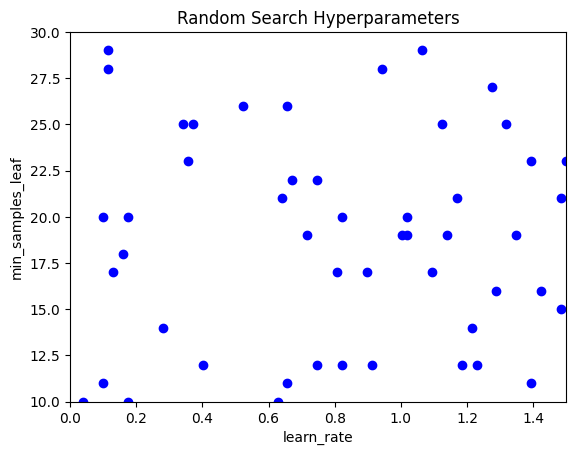

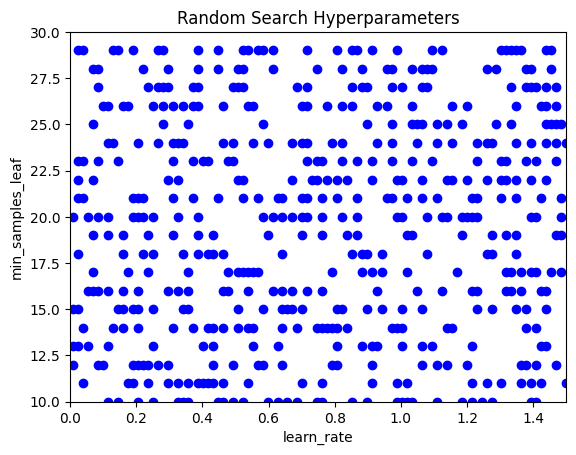

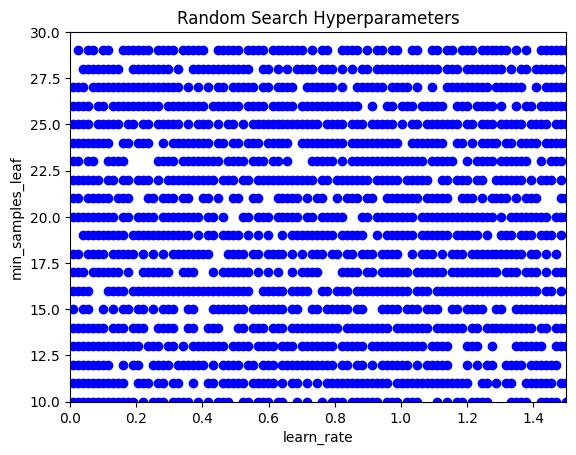

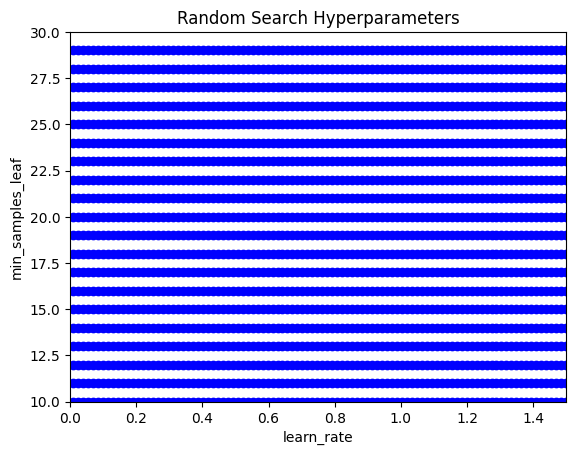

In [17]:
# Code for part 3.1 (continue)

# visualizing a random search
import numpy as np

# create a combinations_list of learn_rate and min_samples_leaf
min_samples_list = list(range(10, 30))
learn_rate_list = np.linspace(0.01, 1.5, 100)
combinations_list = [list(x) for x in product(min_samples_list, learn_rate_list)]

# confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# sample and visualize specified combinations
for x in [50, 500, 1500]:
    # print("Number of combinations: ", x)
    sample_and_visualize_hyperparameters(x)
    
# sample all the hyperparameter combinations & visualize
sample_and_visualize_hyperparameters(number_combs)

#### Part 3.2 Random Search in Scikit-Learn

* Steps: (key difference)
    * Same steps:
1. Choosing an algorithm (to tune the hyperparameters)
2. Defining which hyperparameters we will tune
3. Defining a range of values for each hyperparameter
4. Setting a cross-validation scheme
5. Defining a score function, so we can decide which square on our grid was *'the best'*
6. Include extra useful information or functions
    * Different steps:
7. Decide how many samples to take 

* In *'sklearn'*: (key differences)
    * *'n_iter'*: number of samples for the random search to take from your grid
    * *'param_distribution'*: it is slightly different from *'param_grid'*, it allows optional ability to set a distribution for sampling
    * The output is exactly the same as Grid Search

In [18]:
# Code for part 3.2 

# the RandomizedSearchCV object
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150),
              'min_samples_leaf': list(range(20, 65))}

# create a random search object
random_BGM_class = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    n_jobs=4, 
    cv=5, 
    refit=True, return_train_score=True
)

# fit to the training data
random_BGM_class.fit(X_train, y_train)

# print the values used for both hyperparameters
print(random_BGM_class.cv_results_['param_learning_rate'])
print(random_BGM_class.cv_results_['param_min_samples_leaf'])

[1.885234899328859 1.719463087248322 1.4516778523489933 1.3241610738255034
 0.32953020134228184 1.2093959731543624 0.8906040268456376
 0.3677852348993289 1.0818791946308726 1.5154362416107383]
[36 37 49 40 64 63 58 45 45 55]


In [19]:
# Code for part 3.2 (continue)

# RandomSearchCV in scikit-learn
from sklearn.ensemble import RandomForestClassifier

# create the parameter grid
param_grid = {'max_depth': list(range(5, 26)),
              'max_features': ['auto', 'sqrt']}

# create a random search object
random_rf_class = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_estimators=80),
    param_distributions=param_grid,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=4,
    cv=3,
    refit=True, return_train_score=True  
)

# fit to the training data
random_rf_class.fit(X_train, y_train)

# print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

E:\PYTHON\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[16 25 8 17 7]
['auto' 'sqrt' 'sqrt' 'auto' 'auto']


#### Part 3.3 Comparing Grid and Random Search

**Similarities:**
* Both are automated ways of tuning different hyperparameters
* For both, you set the grid to sample from (which hyperparameters and values for each) 
* For both, you set a cross-validation scheme and scoring function

**Differences:**
* Grid Search tries **all combinations** while Random Search only randomly selects **a subset of combinations**
* Grid Search has **no sampling methodology** while Random Search can select a **sampling methodology**
* Grid Search is **more computationally expensive** than Random Search
* Grid Search is guaranteed to find the **best score** while Random Search can only find a **good score** faster

**Considerations:**
1. Amount of data
2. Number of hyperparameters and values to tune
3. Resources you have

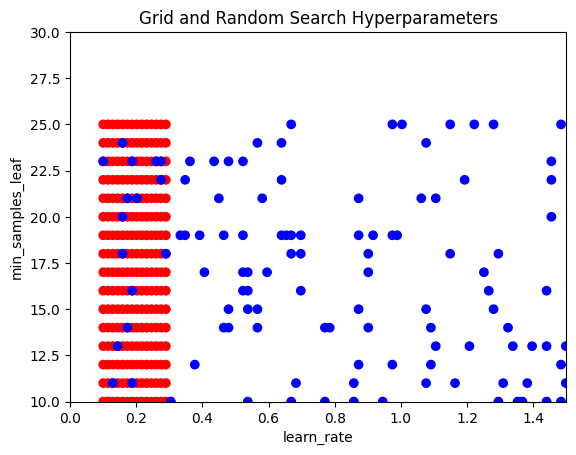

In [20]:
# Code for part 3.3

# grid and random search side by side
import numpy as np
from itertools import product
# import matplotlib.pyplot as plt

# create a combination list
learn_rate_list =  np.linspace(0.1, 3, 200)
min_samples_list = list(range(5, 26))
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# create a function to visualize_search
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
    grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
    rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

    # Plot all together
    plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
    plt.gca().set_xlim(x_lims)
    plt.gca().set_ylim(y_lims)
    plt.show()

# sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# randomly sample 300 indexes to create random sample
sample_indexes = list(range(0, len(combinations_list)))
random_indexes = np.random.choice(sample_indexes, 300, replace=False)
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# visualize 
visualize_search(grid_combinations_chosen, random_combinations_chosen)

# note how differently grid search and random search coordinates are!

### CHAPTER 4. INformed Search

#### Part 4.1 Informed search: coarse to fine

* Grid search and random search are *uninformed search*
* Each iteration of tuning does not learn from the previous iterations

**Coarse to Fine Tuning:**
* A basic informed search methodology
* Start out with a rough, random approach and iteratively refine your search
* Steps:
    1. Random search
    2. Find promising areas
    3. Grid search in the smaller area
    4. Continue until optimal score obtained
    
* Utilize the advantages of both grid and random search

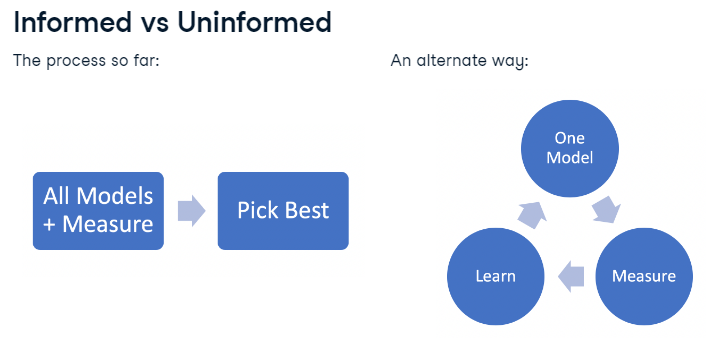

In [21]:
# display informed vs. uninformed

from IPython import display
display.Image("Images/20_informed_uninformed.png")

In [22]:
# pre-defined function to visualize_hyperparameter
# import matplotlib.pyplot as plt
def visualize_hyperparameter(name):
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    plt.show()

In [23]:
# get the variables we need for the exercise

import pandas as pd
import numpy as np
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
    
# get combinations_list
# max_depth_list = list(range(1, 65))
# min_samples_list = list(range(3, 16))
# learn_rate_list = np.linspace(0.01, 2, 200)
# combinations_list = [list(x) for x in product(max_depth_list, min_samples_list, learn_rate_list)]
# print(len(combinations_list))

# get the results_df of 500 trails and into a DataFrame
max_depth = []
min_samples_leaf = []
learn_rate = []
accuracy = []

with open('20_datasets/max_depth.txt') as file1:
    for line in file1:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        max_depth.append(cleaned_line)
max_depth = np.loadtxt(max_depth)

with open('20_datasets/min_samples_leaf.txt') as file2:
    for line in file2:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        min_samples_leaf.append(cleaned_line)
min_samples_leaf = np.loadtxt(min_samples_leaf)

with open('20_datasets/learn_rate.txt') as file3:
    for line in file3:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        learn_rate.append(cleaned_line)
learn_rate = np.loadtxt(learn_rate)

with open('20_datasets/accuracy.txt') as file4:
    for line in file4:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        accuracy.append(cleaned_line)
accuracy = np.loadtxt(accuracy)

results_df = pd.DataFrame({'max_depth': max_depth,
                           'min_samples_leaf': min_samples_leaf,
                           'learn_rate': learn_rate,
                           'accuracy':accuracy})
print(results_df.head())
print(results_df.describe())

   max_depth  min_samples_leaf  learn_rate  accuracy
0        4.0              16.0    0.624362      95.0
1       10.0              14.0    0.477450      97.0
2        7.0              14.0    0.050067      96.0
3        5.0              12.0    0.023356      96.0
4        6.0              12.0    0.771275      97.0
       max_depth  min_samples_leaf  learn_rate    accuracy
count  500.00000        500.000000  500.000000  500.000000
mean    32.87200          9.316000    1.005908   44.220000
std     18.58673          3.929252    0.567375   22.794534
min      1.00000          3.000000    0.010000   10.000000
25%     17.00000          6.000000    0.530872   24.000000
50%     33.00000          9.000000    0.944899   44.000000
75%     50.00000         12.250000    1.482466   58.000000
max     64.00000         16.000000    2.000000   97.000000


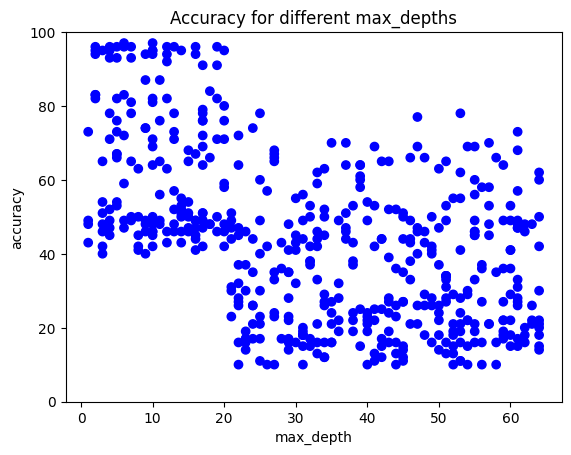

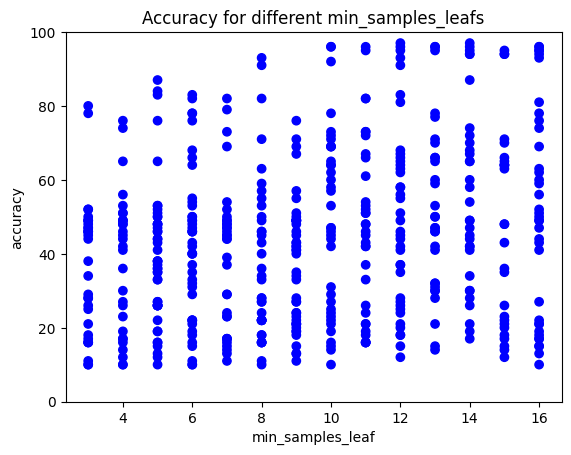

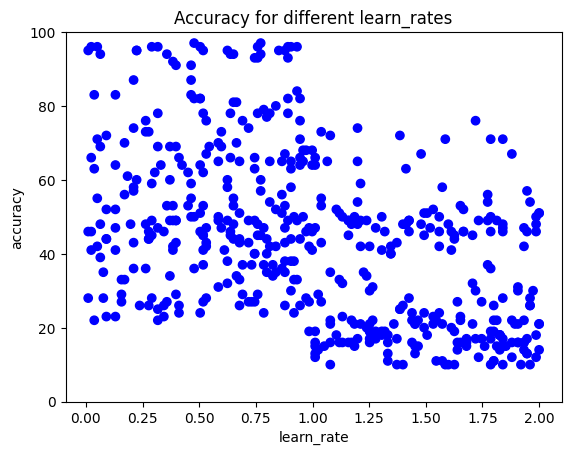

In [24]:
# Code for part 4.1 

# visualizing coarse to fine
import matplotlib.pyplot as plt

# call visualize_hyperparameter() with each hyperparameter  
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learn_rate')


   max_depth  learn_rate  accuracy
0        4.0    0.624362      95.0
1       10.0    0.477450      97.0
2        7.0    0.050067      96.0
3        5.0    0.023356      96.0
4        6.0    0.771275      97.0


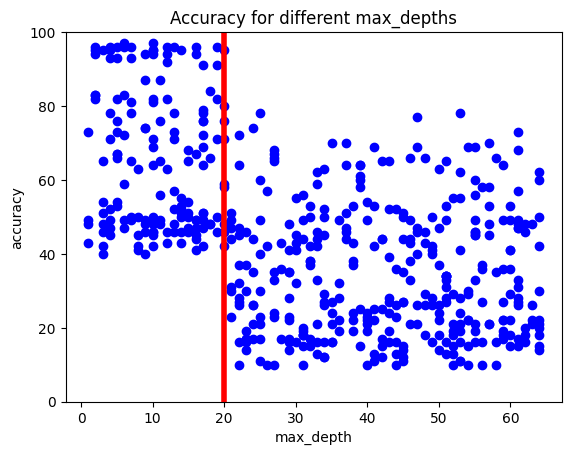

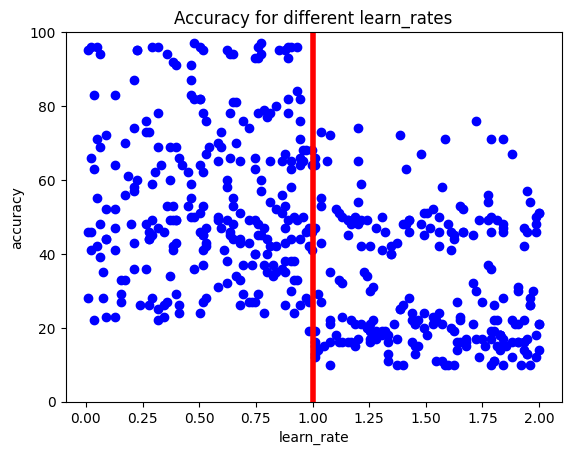

In [25]:
# Code for part 4.1 (continue)

# coarse to fine iterations

# drop 'min_samples_leaf' column
results_df_new = results_df.drop('min_samples_leaf', axis=1)
print(results_df_new.head())

# pre-defined function to visualize first 
def visualize_first():
    for name in results_df_new.columns[0:2]:
        plt.clf()
        plt.scatter(results_df_new[name],results_df_new['accuracy'], c='blue')
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        x_line = 20
        if name == "learn_rate":
            x_line = 1
        plt.axvline(x=x_line, color="red", linewidth=4)
        plt.show() 
        
# call the function to visualize the first results
visualize_first()

   max_depth  learn_rate  accuracy
0        1.0    0.001000      89.0
1        1.0    0.021388      78.0
2        1.0    0.041776      59.0
3        1.0    0.062163      69.0
4        1.0    0.082551      68.0
         max_depth   learn_rate     accuracy
count  1000.000000  1000.000000  1000.000000
mean     10.500000     0.500500    63.476000
std       5.769167     0.294360    14.476429
min       1.000000     0.001000    36.000000
25%       5.750000     0.245653    52.000000
50%      10.500000     0.500500    64.000000
75%      15.250000     0.755347    74.000000
max      20.000000     1.000000    98.000000


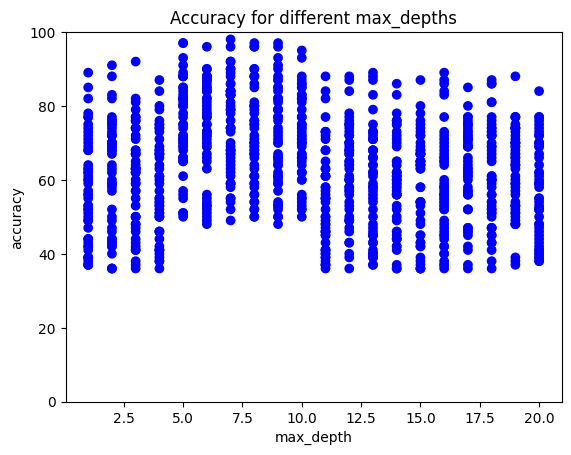

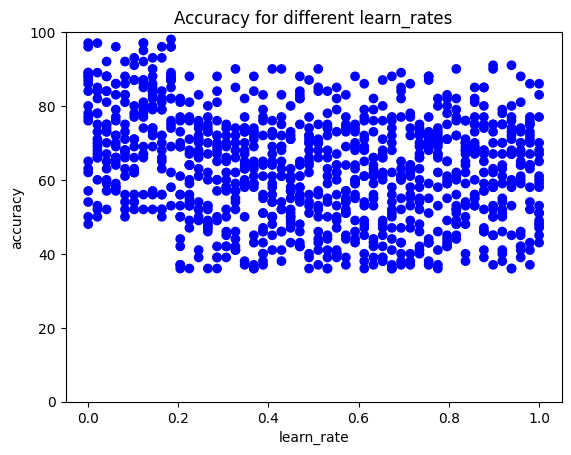

In [26]:
# Code for part 4.1 (continue)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# create some combinations lists and combine
max_depth_list = list(range(1, 21))
learn_rate_list = np.linspace(0.001, 1, 50)

# get results_df2 based on these combinations
max_depth = []
learn_rate = []
accuracy = []

with open('20_datasets/max_depth2.txt') as file1:
    for line in file1:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        max_depth.append(cleaned_line)
max_depth = np.loadtxt(max_depth)

with open('20_datasets/learn_rate2.txt') as file3:
    for line in file3:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        learn_rate.append(cleaned_line)
learn_rate = np.loadtxt(learn_rate)

with open('20_datasets/accuracy2.txt') as file4:
    for line in file4:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        accuracy.append(cleaned_line)
accuracy = np.loadtxt(accuracy)

results_df2 = pd.DataFrame({'max_depth': max_depth,
                           'learn_rate': learn_rate,
                           'accuracy':accuracy})
print(results_df2.head())
print(results_df2.describe())

# define a function to visualize second_results
def visualize_second():
    for name in results_df2.columns[0:2]:
        plt.clf()
        plt.scatter(results_df2[name],results_df2['accuracy'], c=['blue']*1000)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        plt.show()
        
# call the function to visualize the second results
visualize_second()

# note the accuracy of visualize_second() is much higher than visualize_first()

#### Part 4.1 Informed Methods: Bayesian Statistics

**Bayes Rule:**
* A statistical method of using *new evidence* to iteratively updates our beliefs about some outcome
* Form:
 $$  P(A | B) = \frac {P(B | A) P(A)}  {P(B)} $$ 
* LHS = the probability of A, given B has occurred, and B is some new evidence
    * This is known as 'posterior' 
* RHS is how we calculate this:
* P(A) is the 'prior,' and the initial hypothesis about the event
* P(A|B) is the probability given new evidence
* P(B) is the provability of observing this new evidence
* P(B|A) is the 'likelihood' which is the probability of observing the evidence, given the event we care about

**Bayes in hyperparameter tuning:**
* Pick a hyperparameter combination
* Build a model
* Get new evidence (the score of the model)
* Update our beliefs and choose better hyperparameters next round
* Used in *'hyperopt'* package
    * Set the domain: our grid
    * Set the optimization algorithm (default: TPE)
    * Objective function to minimize: (default: 1-Accuracy)

In [27]:
# Code for part 4.2

# Bayes Rule in python
# 7% (0.07) of people are likely to close their account next month
# 15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
# 35% (0.35) of people who are likely to close their account are unhappy with your product

# assign probabilities to variables
p_unhappy = 0.15
p_unhappy_close = 0.35

# probability someone will close
p_close = 0.07

# probability unhappy person will close
p_close_unhappy = (0.35 * 0.07) / 0.15
print(p_close_unhappy)

0.16333333333333336


In [29]:
# Code for part 4.2 (continue)

# Bayesian hyperparameter tuning with Hyperopt
from hyperopt import fmin, tpe, hp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# get the dataset
credit_card = pd.read_csv('20_datasets/credit-card-full.csv')
# print(credit_card.info())

# column preprocessing
credit_card = credit_card.drop(['ID'], axis=1)
credit_card = pd.get_dummies(data=credit_card, columns=['SEX','EDUCATION', 'MARRIAGE'],drop_first=True)
print(credit_card.shape)

# split into training and testing dataframe
X = credit_card.drop(['default payment next month'], axis=1)
y = credit_card['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
  
# set up space dictionary with specified hyperparameters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),
         'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params)
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy',
                                 cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# run the algorithm
best = fmin(fn=objective, space=space, max_evals=20, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

(30000, 31)
100%|██████████| 20/20 [02:25<00:00,  7.25s/trial, best loss: 0.17933333333333334]
{'learning_rate': 0.038093061276450534, 'max_depth': 2.0}


#### Part 4.3 Informed search: Genetic Algorithms

* Genetic evolution in the real world has the following process:
1. There are many creatures existing ('offspring')
2. The strongest creatures survive and pair off
3. There are some 'crossover' as they form offspring
4. There are random mutations to some of the offspring
    * These mutations sometimes give offsprings an advantage
5. Go back to (1)!

* The same idea applies to hyperparameter tuning:
1. We can create some models (with hyperparameter settings)
2. We can pick the best (by our scoring function)
    * These are the ones that 'survive'
3. We can create new models that are similar to the best ones
4. We add in some randomness so we don't reach a local optimum
5. Repeat until we are happy!

**Why it works?**
* It allows us to learn from previous iterations, just like bayesian hyperparameter tuning
* It has the additional advantage of some randomness
* It takes care of many tedious aspects of machine learning
* The library for genetic hyperparameter tuning is: *'TPOT'*:
    * key components:
        * *'generations'*: iterations to run training for
        * *'population_size'*: the number of models to keep after each iteration
        * *'offspring_size'*: number of models to produce in each iteration
        * *'mutation_rate'*: the proportion of pipelines to apply randomness to
        * *'crossover_rate'*: the proportion of pipelines to breed each iteration
        * *'scoring'*: the function to determine the best models
        * *'cv'*: cross-validation strategy to use
* We do not need to specify algorithm hyperparameters, TPOT does it all!

In [31]:
# Code for part 4.3

# genetic hyperparameter tuning with TPOT
from tpot import TPOTClassifier

# assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# create the TPOT classifier
tpot_clf = TPOTClassifier(
    generations=number_generations,
    population_size=population_size,
    offspring_size=offspring_size,
    scoring=scoring_function,
    verbosity=2, random_state=2, cv=2
)

# fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# score on the test set
print(tpot_clf.score(X_test, y_test))


Optimization Progress:   0%|          | 0/13 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8208

Generation 2 - Current best internal CV score: 0.8208

Generation 3 - Current best internal CV score: 0.8208

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=9)
0.8210666666666666


In [33]:
# Code for part 4.3 (continue)

# analyzing TPOT's stability
from tpot import TPOTClassifier

# create the tpot classifier with random_state of 42
tpot_clf = TPOTClassifier(
    generations=2, population_size=4, offspring_size=3, scoring='accuracy',
    cv=2, verbosity=2, random_state=42
)
tpot_clf.fit(X_train, y_train)
print(tpot_clf.score(X_test, y_test))

# create the tpot classifier with random_state of 122
tpot_clf = TPOTClassifier(
    generations=2, population_size=4, offspring_size=3, scoring='accuracy',
    cv=2, verbosity=2, random_state=122
)
tpot_clf.fit(X_train, y_train)
print(tpot_clf.score(X_test, y_test))

# create the tpot classifier with random_state of 99
tpot_clf = TPOTClassifier(
    generations=2, population_size=4, offspring_size=3, scoring='accuracy',
    cv=2, verbosity=2, random_state=99
)
tpot_clf.fit(X_train, y_train)
print(tpot_clf.score(X_test, y_test))

# note how unstable this algorithm is when the generation number and population size are low. The stability will improve if we could try more models with more generations.

Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8204444444444444

Generation 2 - Current best internal CV score: 0.8204444444444444

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
0.8212


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8087111111111112

Generation 2 - Current best internal CV score: 0.8087111111111112

Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=0.5, dual=False, penalty=l2)
0.814


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.794888888888889

Generation 2 - Current best internal CV score: 0.8193777777777778

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=15, min_samples_split=4, n_estimators=100)
0.8209333333333333


This is the end of this course!